<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Откроем файл и посмотрим, какие там хранятся данные.

In [2]:
try:
    data = pd.read_csv('/datasets/insurance.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/insurance.csv')

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Видим, что в данных нет пропусков. У нас есть 5 признаков "пол", "возраст", "зарплата", "члены семьи", "страховые выплаты". Посмотрим на распределение данных и кореляцию между признаками.

In [5]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [6]:
data.corr(method='spearman')

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.000134,0.011823,-0.006578,-0.000172
Возраст,0.000134,1.000000,-0.020238,-0.001503,0.548589
Зарплата,0.011823,-0.020238,1.000000,-0.025492,-0.005549
Члены семьи,-0.006578,-0.001503,-0.025492,1.000000,-0.029210
Страховые выплаты,-0.000172,0.548589,-0.005549,-0.029210,1.000000


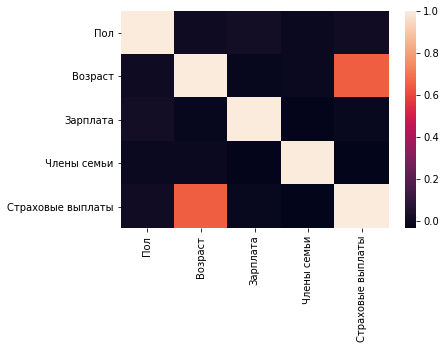

In [7]:
sns.heatmap(data.corr());

Видим, что я `возраст` и `страховые выплаты` имеют более высокую корреляцию, чем остальные признаки. 

Перейдем к следующему пункту, в котором необходимо проверить, изменится ли качество линейной регресси, если изменить данные.

## Умножение матриц

Разделим данные на целевой `features` и `target`.

In [8]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

Обучим модель линейной регрессии и посмотрим результат метрики R2.

In [9]:
model = LinearRegression()
model.fit(features, target)
predictions_1 = model.predict(features)
r2_score(target, predictions_1)

0.4249455028666801

Модель линейной регрессии показала метрику R2 равную 0.424. Теперь нам необходимо проверить, изменится ли качество линейной регрессии, если умножить признаки на обратимую матрицу. Создадим из признаков матрицу.

In [10]:
matrix = features.values

Для решения вопроса нужно умножить матрицу признаков на невырожденную матрицу размерности 4 x 4 (4 - число признаков, а ранг матрицы  не должен быть меньше 4)

Проверить ранг матрицы можно с помощью функции `np.linalg.matrix_rank(A)`.

In [11]:
reversible_matrix = np.array([[1, 2, 3, 4],
                               [4, 3, 2, 1],
                               [5, 7, 1, 9],
                               [1, 3, 5, 11]])

In [12]:
np.linalg.matrix_rank(reversible_matrix)

4

Отлично, создали матрицу с рангом 4. Теперь умножим матрицу с параметрами признаков и созданную матрицу.

In [13]:
new_features = matrix.dot(reversible_matrix)

In [14]:
new_features = pd.DataFrame(new_features, columns=features.columns)

Успешно создали датафрейм из признаков умноженных на невырожденную матрицу.

In [15]:
features.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


In [16]:
new_features.head()

,Пол,Возраст,Зарплата,Члены семьи
0,248166.0,347328.0,49690.0,446456.0
1,190185.0,266141.0,38097.0,342057.0
2,105116.0,147087.0,21058.0,189029.0
3,208586.0,291969.0,41752.0,375343.0
4,130613.0,182786.0,26159.0,234932.0


Видим, что данные очень сильно отличаются. Попробуем еще раз обучить модель линейной регрессии и посмотреть на ее качество.

In [17]:
model = LinearRegression()
model.fit(new_features, target)
predictions = model.predict(new_features)
r2_score(target, predictions)

0.42494550286668165

Видим, что качество модели после умножения матрицы признаков на обратимую матрицу не поменялось.

Далее пойдет теоретическая часть, где будут описаны обозначения и формулы.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Рассмотрим, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**Ответ:** 

В качестве ответа представлена формула, которая будет получена из обоснования.

$$
w' = P^{-1}w,
$$



**Обоснование:** Для обоснования подставим в формулу получения весов для зашифрованной регрессии формулу инференса для незашифрованной регрессии.

Формула для получения весов для зашифрованной регрессии:

$$
w'= ((XP)^T XP)^{-1} (XP)^T y
$$

Формула инференса для незашифрованной регрессии:

$$
y = Xw
$$

Подставим формулу инференса в формулу получения весов и получим:

$$
w'= ((XP)^T XP)^{-1} (XP)^T Xw
$$

Раскроем скобки по основным свойствам операций над матрицами:

$$
w' = (P^T X^T XP)^{-1} P^T X^T X w = 
$$

Потом можем воспользоваться свойством, что: $(ABC)^{-1} = C^{-1} B^{-1} A^{-1}$, где $A = P^T$, $B = X^T X$, $C = P$. Получим:

$$
w' = P^{-1} (X^{T} X)^{-1} (P^T)^{-1} P^T X^T X w
$$

Данную формулу можно сократить и получить ответ:

$$
w' = P^{-1} (X^{T} X)^{-1} E X^T X w = P^{-1} (X^{T} X)^{-1} X^T X w = P^{-1} E w = P^{-1} w
$$

Таким образом можно сделать вывод, что параметры линейной регрессии в исходной задаче связаны с параметрами линейной регрессии в преобразованной задаче некоторым ключом шифрования, который представляет из себя обратную невырожденную матрицу.

## Алгоритм преобразования

Предложим алгоритм преобразования данных для решения задачи. Обоснуем, почему качество линейной регрессии не поменяется.

**Алгоритм**

Для защиты данных клиентов страховой компании «Хоть потоп» разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Возьмём признаки, которые являются данными клиентов. Представим эти данные в виде матрицы n x m.

Для шифрования данных необходимо полученную матрицу умножить на матрицу размерностью m x m. Данная матрица обязательно должна быть обратимой, т.е. квадратная матрица, которая является невырожденной. Ранг матрицы должен быть не меньше m.

После умножения на обратимую матрицу мы получаем новые данные, которые можем использовать в моделе линейной регрессии и ее качество не изменится.

Чтобы расшифровать данные необходимо умножить их на обратную матрицу размерности m x m.

Идея в том, что домножив матрицу признаков на квадратную невырожденную матрицу, мы практически не влияем на предсказательную силу линейной регрессии. Таким образом, страховая компания может "зашифровать" датасет (признаковую его часть) и передать его исследователям, не боясь потери персональных данных

**Обоснование**

Во втором пункте мы проверили теорию о том, что  качество линейной регрессии не поменялось, когда мы умножили матрицу признаков на случайную невырожденную обратимую матрицу определенной размерности.

Разберемся, почему так происходит. У нас есть формулы для обучения линейной регрессии матрицей без изменений и с изменениями, запишем их.

Формула предсказания исходной матрицы:

$$
a = Xw
$$

Формула обучения для исходной матрицы:

$$
w = (X^T X)^{-1} X^T y
$$

Формула предсказания преобразованной матрицы:

$$
a' = XP w'
$$

Формула обучения для преобразованной матрицы:

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$

Во втором пункте мы определили, что параметры линейной регрессии в исходной задаче связаны с параметрами линейной регрессии в преобразованной задаче некоторым ключом шифрования, который представляет из себя обратную невырожденную матрицу. Таким образом подставим параметры линейной регрессии, которые мы определили в прошлом пункте в формулу предсказания преобразованной матрицы:

$$
a' = XP w' = XPP^{-1}w = Xw = a
$$

С помощью преобразований и подстановок, видим, что предсказания преобразованной матрицы равняются предсказаниям исходной матрицы. 

Таким образом качество линейной регрессии не меняется если мы умножаем исходную матрицу на обратимую матрицу.

## Проверка алгоритма

Запрограммируем алгоритм преобразования данных. Для начала попробуем написать алгоритм генерации ключа (невырожденная квадратная матрица).

In [18]:
def revers_matrix(number):
    array = np.random.randint(1, 11, size=(number, number))
    while np.linalg.matrix_rank(array) < 4:
        array = np.random.randint(1, 11, size=(number, number))
    return (array)

Далее создадим функцию для шифрования данных (умножение матрицы признаков на матрицу-ключ)

In [19]:
def encryption(features):
    new_features = (features.values).dot(revers_matrix(features.shape[1]))
    return pd.DataFrame(new_features, columns=features.columns)

Проверим новые данные, отличается ли качество линейной  регрессии исходных данных от качества линейной регрессии преобразованных данных. 

In [20]:
new_features = encryption(features)

Модель с исходными данными. Посмотрим на ее качество.

In [21]:
model_1 = LinearRegression()
model_1.fit(features, target)
predictions_1 = model_1.predict(features)
r2_score(target, predictions_1)

0.4249455028666801

Модель с преобразованными данными. Также проверим качество данной модели.

In [22]:
model_2 = LinearRegression()
model_2.fit(new_features, target)
predictions_2 = model_2.predict(new_features)
r2_score(target, predictions_2)

0.42494550286668153

Заметим, что качества моделей практически не различимы.

**Вывод:**

В данном проекте нужно было защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. После проеделанной работы можно сделать вывод, что:

- мы научились преобразовывать исходные данные с помощью невырожденной обратимой матрицы;
- разобрались с тем, как связаны параметры линейной регрессии в исходной задаче и в преобразованной;
- доказали, что качество модели линейной регрессии с исходными данными не отличается от качества модели с преобразованными данными;
- создали функции, с помощью которых можно зашифровать данные.

Таким образом мы полностью ывполнили поставленную задачу, защитили данные клиентов.